In [8]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
DATASET_DIR="./dataset"
IMAGE_SIZE=(70,70)

TRAIN_FEATURES=[]
TRAIN_LABELS=[]

TEST_FEATURES=[]
TEST_LABELS=[]


In [10]:

def read_samples(dir, features, labels):
    clasess_dir = os.listdir(dir)
    for class_name in clasess_dir:
        image_names = os.listdir(dir+"/"+class_name)
        for img_name in image_names:
            img = cv2.imread(dir+"/"+class_name+"/"+img_name, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMAGE_SIZE, cv2.INTER_AREA)
            feature = np.reshape(img, (img.shape[0]*img.shape[1]))

            features.append(feature)
            labels.append(class_name)


In [11]:

def build_RFC(train_samples, train_labels):
    rfc_model = RandomForestClassifier()
    return rfc_model.fit(train_samples, train_labels)


In [12]:

def build_SVC(train_samples, train_labels):
    svc_model = SVC(kernel="poly", gamma="auto")
    return svc_model.fit(train_samples, train_labels)

In [13]:
# # read testing samples
# read_samples(TRAIN_DATASET_DIR, TEST_FEATURES, TEST_LABELS)

# # read testing samples
# read_samples(TEST_DATASET_DIR, TEST_FEATURES, TEST_LABELS)

↑↑↑If the trainingset and testingset are seperated use the code above ↑↑↑↑.

In [14]:
# read whole dataset samples
read_samples(DATASET_DIR, TRAIN_FEATURES, TRAIN_LABELS)

In [15]:
from sklearn.model_selection import train_test_split
TRAIN_FEATURES, TEST_FEATURES, TRAIN_LABELS, TEST_LABELS = \
    train_test_split(TRAIN_FEATURES, TRAIN_LABELS, train_size=0.6, test_size=0.4)

↑↑↑ Instead of seperating the trainingset and testingset you can, use the whole data set and split it like the code above 🧐.↑↑↑

In [16]:
# build Random Forest Classifier
rfc_model = build_RFC(TRAIN_FEATURES, TRAIN_LABELS)

# build Support Vector Classifier
svc_model = build_SVC(TRAIN_FEATURES, TRAIN_LABELS)

In [17]:
# testing RFC model
rfc_predicted_labels = rfc_model.predict(TEST_FEATURES)

# testing SVC model
svc_predicted_labels = svc_model.predict(TEST_FEATURES)

rfc_accuracy = accuracy_score(TEST_LABELS, rfc_predicted_labels)*100
svc_accuracy = accuracy_score(TEST_LABELS, svc_predicted_labels)*100

# calculating accuracy
print("random forest classifier accuracy = {:.4f}%".format(rfc_accuracy))
print("Support Vector Classification = {:.4f}%".format(svc_accuracy))

random forest classifier accuracy = 96.1905%
Support Vector Classification = 97.0893%


<BarContainer object of 2 artists>

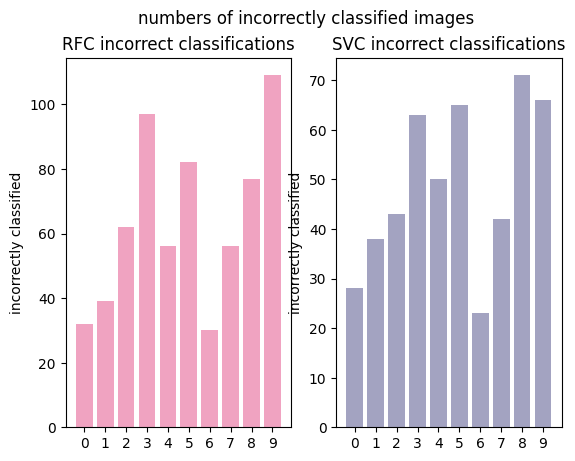

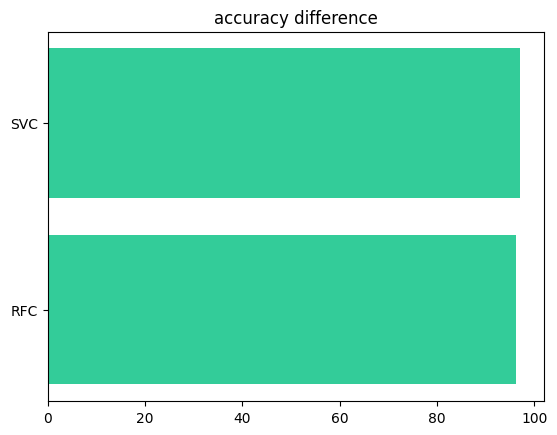

In [18]:
rfc_losses = np.zeros(10, dtype='int64')
for indx,predicted_lbl in enumerate(rfc_predicted_labels):
    if int(TEST_LABELS[indx]) != int(predicted_lbl):
        rfc_losses[int(TEST_LABELS[indx])] += 1

svc_losses = np.zeros(10, dtype='int64')
for indx,predicted_lbl in enumerate(svc_predicted_labels):
    if int(TEST_LABELS[indx]) != int(predicted_lbl):
        svc_losses[int(TEST_LABELS[indx])] += 1

import matplotlib.pyplot as plt

langs = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('numbers of incorrectly classified images')
ax1.title.set_text('RFC incorrect classifications')
ax2.title.set_text('SVC incorrect classifications')
ax1.bar(langs,rfc_losses, color=(0.9, 0.4, 0.6, 0.6))
ax1.set_ylabel('incorrectly classified')
ax2.bar(langs,svc_losses, color=(0.4, 0.4, 0.6, 0.6))
ax2.set_ylabel('incorrectly classified')

fig, (ax3) = plt.subplots(1, 1)
ax3.title.set_text('accuracy difference')
ax3.barh(['RFC', 'SVC'],[rfc_accuracy, svc_accuracy], align='center', color=(0.2, 0.8, 0.6, 1.0))



previous step not really necessary and can be optimized but did it to check where is most of the losses.🤷